In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')
# providing all the headers required for this assignment 



In [59]:
# Importing data from CSV file

data = pd.read_csv('/Users/chavali/Downloads/train.csv')

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [60]:
data.shape

(1460, 81)

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [62]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [63]:
data.replace(
    to_replace='Select',
    value=np.nan,
    inplace=True,
    limit=None,
    regex=True,
    method='pad',
)
data.head()
# changed the missing values to nan 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [64]:
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [65]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [66]:
print(data['PoolQC'].describe())

count      7
unique     3
top       Gd
freq       3
Name: PoolQC, dtype: object


In [67]:
print(data['PoolQC'].value_counts())

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64


In [68]:
print(data['MiscFeature'].describe())
print(data['MiscFeature'].value_counts())

count       54
unique       4
top       Shed
freq        49
Name: MiscFeature, dtype: object
Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64


In [69]:
print(data['Alley'].describe())
print(data['Alley'].value_counts())
print(data['Fence'].describe())
print(data['Fence'].value_counts())

count       91
unique       2
top       Grvl
freq        50
Name: Alley, dtype: object
Grvl    50
Pave    41
Name: Alley, dtype: int64
count       281
unique        4
top       MnPrv
freq        157
Name: Fence, dtype: object
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64


In [70]:
data2 = data.drop(columns= ['PoolQC','MiscFeature','Alley','Fence'])
data2.head()
# removed the columns which have more than 50% missing values 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [71]:


print(data['FireplaceQu'].describe())
print(data['FireplaceQu'].value_counts())

count     770
unique      5
top        Gd
freq      380
Name: FireplaceQu, dtype: object
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64


In [72]:
data3 = data2.drop(columns= ['FireplaceQu'])
data3.head()
# removed the column as it has more than 50% missing values 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [73]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

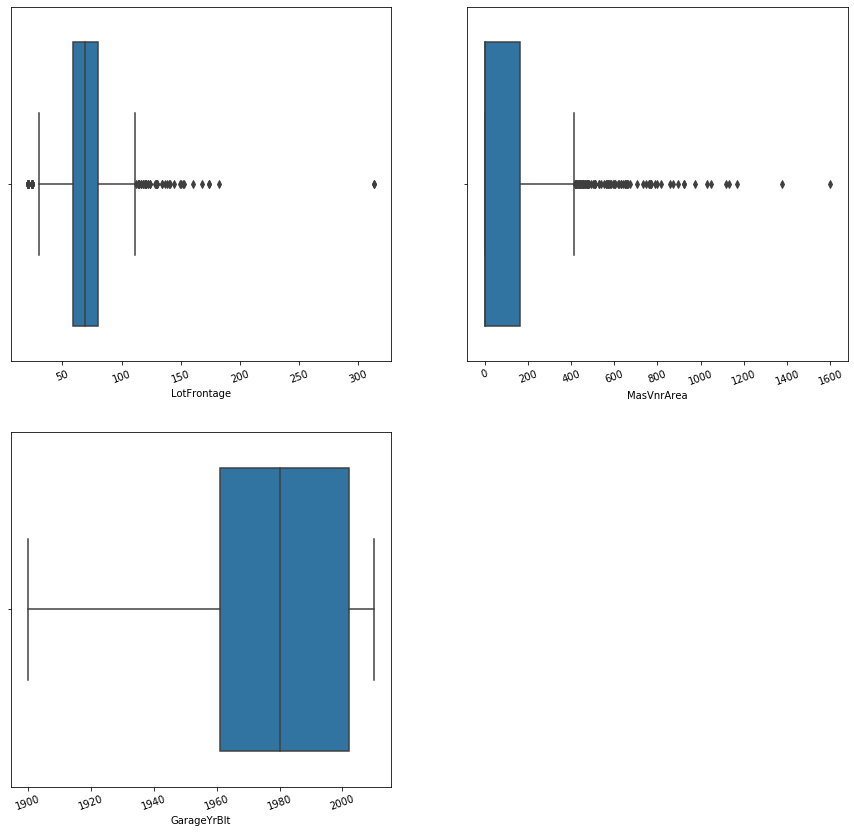

In [74]:

# checking for the outliers 
plt.figure(figsize=(15,30))
features = ['LotFrontage','MasVnrArea','GarageYrBlt',]
for i in enumerate(features): 
    ax = plt.subplot(4, 2, i[0]+1)
    sns.boxplot(x=i[1], data=data3)
    plt.xticks(rotation = 20)
    # checked the outliers for the continous variable as they have missing values 

In [75]:
print(data['LotFrontage'].describe())
print(data['MasVnrArea'].describe())
print(data['GarageYrBlt'].describe())

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64
count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64


In [76]:
print(data['MasVnrType'].describe())
print(data['MasVnrType'].value_counts()) 

print(data['BsmtQual'].describe())
print(data['BsmtQual'].value_counts()) 

print(data['BsmtCond'].describe())
print(data['BsmtCond'].value_counts()) 

print(data['BsmtExposure'].describe())
print(data['BsmtExposure'].value_counts()) 

print(data['BsmtFinType1'].describe())
print(data['BsmtFinType1'].value_counts())

print(data['BsmtFinType2'].describe())
print(data['BsmtFinType2'].value_counts())

print(data['Electrical'].describe())
print(data['Electrical'].value_counts())

print(data['GarageFinish'].describe())
print(data['GarageFinish'].value_counts())


print(data['GarageQual'].describe())
print(data['GarageQual'].value_counts())

print(data['GarageCond'].describe())
print(data['GarageCond'].value_counts())

# checked the values and describe for the categorial column in missing values 

count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
count     1423
unique       4
top         TA
freq       649
Name: BsmtQual, dtype: object
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
count     1423
unique       4
top         TA
freq      1311
Name: BsmtCond, dtype: object
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
count     1422
unique       4
top         No
freq       953
Name: BsmtExposure, dtype: object
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
count     1423
unique       6
top        Unf
freq       430
Name: BsmtFinType1, dtype: object
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
count     1422
unique       6
top        Unf
freq      1256
Name: BsmtFinType2, dtype: object
Unf    1256
Rec      54
LwQ      46
BLQ  

In [77]:
data3['LotFrontage'].replace(
    to_replace=np.nan,
    value=data3['LotFrontage'].mean(),
    inplace=True,
    limit=None,
    regex=False,
    method='pad',
)


In [78]:
data3['MasVnrArea'].replace(
    to_replace=np.nan,
    value=data3['MasVnrArea'].mean(),
    inplace=True,
    limit=None,
    regex=False,
    method='pad',
)

data3['GarageYrBlt'].replace(
    to_replace=np.nan,
    value=data3['GarageYrBlt'].median(),
    inplace=True,
    limit=None,
    regex=False,
    method='pad',
)
  
data3['MasVnrType'].replace(
    to_replace=np.nan,
    value='None',
    inplace=True,
    limit=None,
    regex=False,
    method='pad',
)

data3['BsmtQual'].replace(
    to_replace=np.nan,
    value='None',
    inplace=True,
    limit=None,
    regex=False,
    method='pad',
)

data3['BsmtCond'].replace(
    to_replace=np.nan,
    value='TA',
    inplace=True,
    limit=None,
    regex=False,
    method='pad',
)


data3['BsmtExposure'].replace(
    to_replace=np.nan,
    value='No',
    inplace=True,
    limit=None,
    regex=False,
    method='pad',
)

data3['BsmtFinType1'].replace(
    to_replace=np.nan,
    value='None',
    inplace=True,
    limit=None,
    regex=False,
    method='pad',
)

data3['BsmtFinType2'].replace(
    to_replace=np.nan,
    value='Unf',
    inplace=True,
    limit=None,
    regex=False,
    method='pad',
)

data3['Electrical'].replace(
    to_replace=np.nan,
    value='SBrkr',
    inplace=True,
    limit=None,
    regex=False,
    method='pad',
)


data3['GarageFinish'].replace(
    to_replace=np.nan,
    value='None',
    inplace=True,
    limit=None,
    regex=False,
    method='pad',
)

data3['GarageQual'].replace(
    to_replace=np.nan,
    value='TA',
    inplace=True,
    limit=None,
    regex=False,
    method='pad',
)


data3['GarageCond'].replace(
    to_replace=np.nan,
    value='TA',
    inplace=True,
    limit=None,
    regex=False,
    method='pad',
)

# replaced the null or missing values accordingly 

In [79]:
data3.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
                 ..
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
GarageType       81
GarageYrBlt       0
GarageFinish      0
GarageCars        0
GarageArea        0
GarageQual        0
GarageCond        0
PavedDrive        0
WoodDeckSF        0


In [80]:
print(data['GarageType'].describe())
print(data['GarageType'].value_counts())


count       1379
unique         6
top       Attchd
freq         870
Name: GarageType, dtype: object
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


In [81]:
data3['GarageType'].replace(
    to_replace=np.nan,
    value='None',
    inplace=True,
    limit=None,
    regex=False,
    method='pad',
)
# removed the missing values 

In [82]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [83]:
data3['YrSold'].max()

2010

In [84]:
data3['YrSold']=data3.apply(lambda x: 2010 - x['YrSold'], axis=1)
# changed the years into age to change into to orderly column

In [85]:
data3.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,3,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,4,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2,WD,Normal,250000


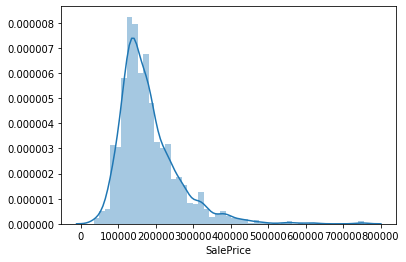

In [86]:
sns.distplot(data3['SalePrice'])
plt.show()
#checked the distribution of the sales price 

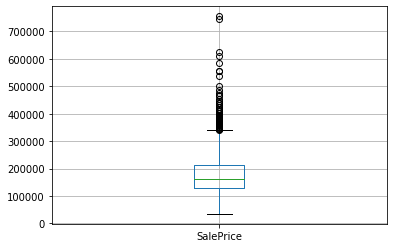

In [87]:
data3.boxplot(column='SalePrice')
plt.show()
#the outliers of the column

In [88]:
data3['price']=data3['SalePrice']
print(data3['price'])

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
         ...  
1430    192140
1431    143750
1432     64500
1433    186500
1434    160000
1435    174000
1436    120500
1437    394617
1438    149700
1439    197000
1440    191000
1441    149300
1442    310000
1443    121000
1444    179600
1445    129000
1446    157900
1447    240000
1448    112000
1449     92000
1450    136000
1451    287090
1452    145000
1453     84500
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: price, Length: 1460, dtype: int64


In [89]:
data3['salesprice']=np.log10(data3['price'])
#checked with natural log, log2, sqrt and cube root therefore transforming with log10  

In [90]:
print(data3['salesprice'])

0       5.319106
1       5.258877
2       5.349278
3       5.146128
4       5.397940
5       5.155336
6       5.487138
7       5.301030
8       5.113609
9       5.071882
10      5.112270
11      5.537819
12      5.158362
13      5.446382
14      5.195900
15      5.120574
16      5.173186
17      4.954243
18      5.201397
19      5.143015
20      5.512284
21      5.144263
22      5.361728
23      5.113609
24      5.187521
25      5.408749
26      5.129690
27      5.485721
28      5.317018
29      4.835691
          ...   
1430    5.283618
1431    5.157608
1432    4.809560
1433    5.270679
1434    5.204120
1435    5.240549
1436    5.080987
1437    5.596176
1438    5.175222
1439    5.294466
1440    5.281033
1441    5.174060
1442    5.491362
1443    5.082785
1444    5.254306
1445    5.110590
1446    5.198382
1447    5.380211
1448    5.049218
1449    4.963788
1450    5.133539
1451    5.458018
1452    5.161368
1453    4.926857
1454    5.267172
1455    5.243038
1456    5.322219
1457    5.4256

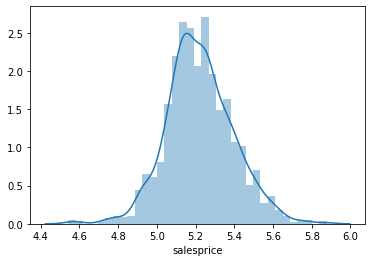

In [91]:
sns.distplot(data3['salesprice'])
plt.show()
# this graph is nearly to a normally distributed curve 

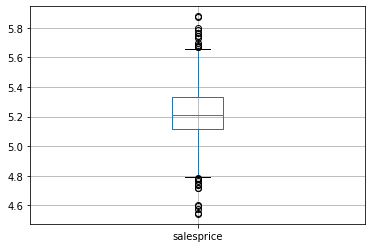

In [92]:
data3.boxplot(column='salesprice')
plt.show()

In [93]:
data4 = data3.drop(columns= ['price','SalePrice'])
data4.head()
# removed the extra columns that were created 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,salesprice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2,WD,Normal,5.319106
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,3,WD,Normal,5.258877
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2,WD,Normal,5.349278
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,4,WD,Abnorml,5.146128
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2,WD,Normal,5.397940


In [94]:
for i in data4.columns:
    print(data4[i].nunique())

1460
15
5
111
1073
2
4
4
2
5
3
25
9
8
5
8
10
9
112
61
6
8
15
16
4
328
4
5
6
5
4
4
7
637
6
144
780
721
6
5
2
5
753
417
24
861
4
3
4
3
8
4
4
12
7
4
7
97
4
5
441
5
5
3
274
202
120
20
76
8
21
12
5
9
6
663


In [95]:
data4.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [96]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [97]:
data5 = data4.drop(columns= ['Id'])
data5.head()
# removed the ID as it wouldn't affect the price at all

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,salesprice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2,WD,Normal,5.319106
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,3,WD,Normal,5.258877
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2,WD,Normal,5.349278
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,4,WD,Abnorml,5.146128
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2,WD,Normal,5.397940


In [98]:
X = data5.loc[:, ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition',]]

y = data5['salesprice']

In [99]:
data5_categorical = X.select_dtypes(include=['object'])
data5_categorical.head()


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [100]:
data5_dummies = pd.get_dummies(data5_categorical, drop_first=True)
data5_dummies.head()

# created the dummies to all categorical variables 

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [101]:
X = X.drop(list(data5_categorical.columns), axis=1)

In [102]:
X = pd.concat([X, data5_dummies], axis=1)

In [103]:
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=236)

In [104]:
# split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [105]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score


In [106]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
r2_score(y_true=y_train, y_pred=y_train_pred)

0.9579154062884343

In [107]:


rfe = RFE(lm, 20)             # running RFE automatic approach
rfe = rfe.fit(X_train, y_train)

In [108]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 34),
 ('LotFrontage', False, 77),
 ('LotArea', False, 31),
 ('OverallQual', True, 1),
 ('OverallCond', False, 20),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 26),
 ('MasVnrArea', False, 202),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', False, 3),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 45),
 ('BsmtHalfBath', False, 212),
 ('FullBath', False, 166),
 ('HalfBath', False, 167),
 ('BedroomAbvGr', False, 107),
 ('KitchenAbvGr', False, 46),
 ('TotRmsAbvGrd', False, 177),
 ('Fireplaces', False, 27),
 ('GarageYrBlt', False, 204),
 ('GarageCars', False, 21),
 ('GarageArea', False, 47),
 ('WoodDeckSF', False, 66),
 ('OpenPorchSF', False, 122),
 ('EnclosedPorch', False, 124),
 ('3SsnPorch', False, 135),
 ('ScreenPorch', False, 73),
 ('PoolArea', False, 187),
 ('MiscVal', False, 200),
 ('MoSold', False, 211),
 ('YrSold', False, 127),
 

In [109]:
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'YearBuilt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'RoofMatl_WdShngl',
       'Exterior1st_AsphShn', 'BsmtQual_None', 'BsmtFinType1_None',
       'GarageType_None', 'GarageFinish_None', 'GarageQual_Fa',
       'GarageQual_Gd', 'GarageCond_TA', 'SaleType_New',
       'SaleCondition_Partial'],
      dtype='object')

In [110]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'YearRemodAdd',
       'MasVnrArea', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       ...
       'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw',
       'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal'],
      dtype='object', length=216)

In [111]:
X_train_rfe = X_train[col]

In [112]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             salesprice   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     268.3
Date:                Mon, 18 May 2020   Prob (F-statistic):               0.00
Time:                        16:38:34   Log-Likelihood:                 1196.4
No. Observations:                1021   AIC:                            -2359.
Df Residuals:                    1004   BIC:                            -2275.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.22

In [113]:







# Adding a constant variable 
X_test = sm.add_constant(X_test)



X_test = X_test.fillna(X_train_rfe.mean())






In [114]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 
# performing the Ridge regression 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [115]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002607,0.001749,0.001203,0.000403,0.0001,{'alpha': 0.0001},-0.047028,-0.050965,-0.053830,-0.050541,...,-0.050475,0.002173,26,-0.051098,-0.044987,-0.047906,-0.049877,-0.050037,-0.048781,0.002159
1,0.004229,0.001623,0.001805,0.000403,0.001,{'alpha': 0.001},-0.047028,-0.050965,-0.053830,-0.050541,...,-0.050475,0.002173,25,-0.051098,-0.044987,-0.047906,-0.049877,-0.050037,-0.048781,0.002159
2,0.003231,0.000955,0.000981,0.000046,0.01,{'alpha': 0.01},-0.047028,-0.050965,-0.053830,-0.050541,...,-0.050475,0.002173,24,-0.051097,-0.044987,-0.047906,-0.049876,-0.050036,-0.048780,0.002159
3,0.001865,0.000289,0.000598,0.000488,0.05,{'alpha': 0.05},-0.047027,-0.050965,-0.053829,-0.050539,...,-0.050474,0.002173,23,-0.051096,-0.044987,-0.047905,-0.049875,-0.050036,-0.048780,0.002159
4,0.003031,0.001057,0.001181,0.000415,0.1,{'alpha': 0.1},-0.047025,-0.050965,-0.053828,-0.050538,...,-0.050473,0.002174,22,-0.051095,-0.044987,-0.047903,-0.049874,-0.050034,-0.048779,0.002158


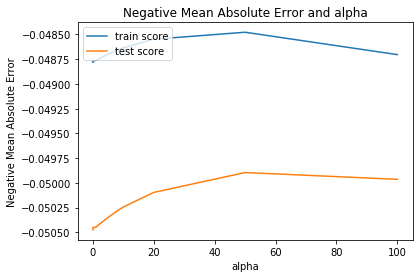

In [116]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

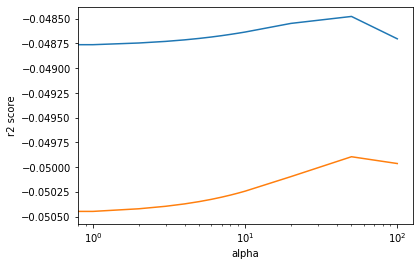

In [117]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()
# performing plot with the r2 scoce and alpha

In [118]:
alpha = 50
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
ridge.coef_
# at the cut off point the alpha was 50 since we selected the alpha

array([ 0.        ,  0.06114384,  0.03824365,  0.01084548,  0.00461027,
       -0.00236719,  0.03198766,  0.01558771, -0.0014831 ,  0.03634465,
        0.00552024, -0.00194584, -0.00489546, -0.00489546, -0.00681142,
       -0.00681142, -0.00368073,  0.00418286,  0.00312202,  0.00381546,
        0.00377363])

In [119]:
lm = Lasso(alpha=0.001)
lm.fit(X_train_rfe, y_train)





Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [120]:
y_train_pred = lm.predict(X_train_rfe)
print(r2_score(y_true=y_train, y_pred=y_train_pred))

# the r2 score is 80




0.8099653551418007


In [121]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train_rfe.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))


[('constant', 5.221),
 ('const', 0.0),
 ('OverallQual', 0.065),
 ('YearBuilt', 0.039),
 ('BsmtFinSF1', 0.009),
 ('BsmtFinSF2', 0.004),
 ('BsmtUnfSF', -0.004),
 ('1stFlrSF', 0.02),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.002),
 ('GrLivArea', 0.054),
 ('RoofMatl_WdShngl', 0.005),
 ('Exterior1st_AsphShn', -0.002),
 ('BsmtQual_None', -0.009),
 ('BsmtFinType1_None', -0.0),
 ('GarageType_None', -0.012),
 ('GarageFinish_None', -0.0),
 ('GarageQual_Fa', -0.003),
 ('GarageQual_Gd', 0.003),
 ('GarageCond_TA', 0.002),
 ('SaleType_New', 0.006),
 ('SaleCondition_Partial', 0.0)]

In [122]:

# set up cross validation scheme
folds = 5

# specify range of hyperparameters
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0,20.0, 50.0]}

# grid search
# lasso model
model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0, 20.0, 50.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [123]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004309,0.000766,0.001388,0.000461,0.001,{'alpha': 0.001},0.846087,0.624716,0.759490,0.837190,...,0.784735,0.086952,1,0.800149,0.844875,0.822844,0.802640,0.793152,0.812732,0.018862
1,0.003178,0.000905,0.001590,0.000836,0.01,{'alpha': 0.01},0.832899,0.672840,0.756298,0.816235,...,0.780186,0.059917,2,0.783054,0.829505,0.805736,0.786614,0.777634,0.796509,0.019021
2,0.005088,0.001110,0.002534,0.000597,1,{'alpha': 1.0},-0.010402,-0.009314,-0.000115,-0.009225,...,-0.007651,0.003793,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.003791,0.000412,0.002029,0.000648,5,{'alpha': 5.0},-0.010402,-0.009314,-0.000115,-0.009225,...,-0.007651,0.003793,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.004969,0.001429,0.001404,0.000491,10,{'alpha': 10.0},-0.010402,-0.009314,-0.000115,-0.009225,...,-0.007651,0.003793,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


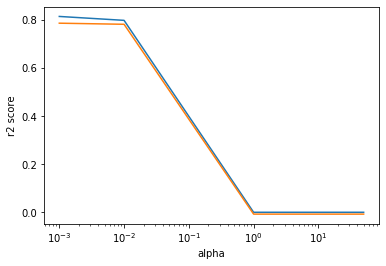

In [124]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()
#The r2 score and alpha the test was contast till 0.01 but started decreasing after it so taking the alpha as 0.01 

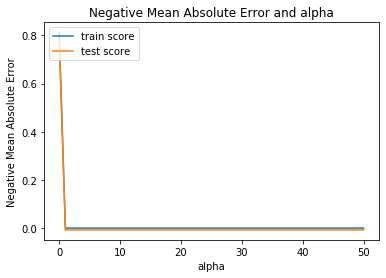

In [125]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()
#plot with negative mean absolute error and alpha

In [126]:

alpha =0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 
# performed the alpha values 


Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [127]:
lasso.coef_

array([ 0.00000000e+00,  6.89907996e-02,  3.45519663e-02,  7.58261349e-03,
        0.00000000e+00, -0.00000000e+00,  1.77628338e-02,  0.00000000e+00,
       -0.00000000e+00,  4.69549505e-02,  0.00000000e+00, -0.00000000e+00,
       -1.73322224e-03, -3.11442009e-18, -6.40144313e-03, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00])

In [128]:
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))
# the coeefient of each varriable 
# the most significant is the LotFrontage, BsmtFinSF2 and LotArea
# these variables can be used in predicting the price of the varaible 

[('constant', 5.221),
 ('MSSubClass', 0.0),
 ('LotFrontage', 0.065),
 ('LotArea', 0.039),
 ('OverallQual', 0.009),
 ('OverallCond', 0.004),
 ('YearBuilt', -0.004),
 ('YearRemodAdd', 0.02),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', -0.002),
 ('BsmtFinSF2', 0.054),
 ('BsmtUnfSF', 0.005),
 ('TotalBsmtSF', -0.002),
 ('1stFlrSF', -0.009),
 ('2ndFlrSF', -0.0),
 ('LowQualFinSF', -0.012),
 ('GrLivArea', -0.0),
 ('BsmtFullBath', -0.003),
 ('BsmtHalfBath', 0.003),
 ('FullBath', 0.002),
 ('HalfBath', 0.006),
 ('BedroomAbvGr', 0.0)]

In [155]:
lasso.fit(X_train_rfe, y_train)

# predict
y_train_pred = lasso.predict(X_train_rfe)
print(r2_score(y_true=y_train, y_pred=y_train_pred))






0.7947094648509071
